In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.feature_selection import RFE

### Importing Data

Dataset 2930 entries, - 24 features, 1 target.
No background info on features and their relations between eachother and to the target. 

In [1235]:
df = pd.read_csv("prediktiv_data.csv", sep =(","), index_col = "id")
pd.set_option('display.max_columns', 25)

In [1236]:
df.head()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature10.1,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,1960,1,NaN,NaN,red,2,good,bad,3,1,5,2010,0,0,1960
2,105000,1.0,730.0,0,882.0,896,5,896,5,6,1961,1,NaN,dog,red,0,NaN,bad,2,1,6,2010,0,0,1961
3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,1958,1,NaN,NaN,red,0,NaN,good,3,1,6,2010,1,0,1958
4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,1968,2,NaN,NaN,red,2,bad,amazing,3,1,4,2010,1,0,1968
5,189900,2.0,482.0,0,928.0,928,6,1629,5,5,1997,2,NaN,dog,red,1,bad,bad,3,1,3,2010,1,701,1998


### Exploratory Data Analisys

#### Following EDA suggests:

- As we dont see relations between data, and columns we cannot really make changes based on the content. (For example we cat fix NaNs based on info from other columns, or see if outliers is a mistake in data recording or legitimate information).
- Also difficuilt to say if numerical data in some columns represents nominal or ordinal variables (1,2,3 could be number of bedrooms or preprocessed ordinal data).
- There are 5 columns with categorical data....  
- Data set has outliers that might affect predictions.
- Target points are skewed right, log tranformation might improve predictions.
- Scaling should be adjusted, to improve modelling.


#### Hypothesis
- Simple correlation analisys points out approx. 10 features. Using models on those features will improve predictions comparing to those taking in all data. Essembling metods will minimase prediction errors even more.

**For conclusions and reflections, see the last part of this document**

In [1237]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 1 to 2930
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       2930 non-null   int64  
 1   feature01    2929 non-null   float64
 2   feature02    2929 non-null   float64
 3   feature03    2930 non-null   int64  
 4   feature04    2929 non-null   float64
 5   feature05    2930 non-null   int64  
 6   feature06    2930 non-null   int64  
 7   feature07    2930 non-null   int64  
 8   feature08    2930 non-null   int64  
 9   feature09    2930 non-null   int64  
 10  feature10    2930 non-null   int64  
 11  feature10.1  2930 non-null   int64  
 12  feature11    198 non-null    object 
 13  feature12    572 non-null    object 
 14  feature13    2929 non-null   object 
 15  feature14    2930 non-null   int64  
 16  feature15    1508 non-null   object 
 17  feature16    2930 non-null   object 
 18  feature17    2930 non-null   int64  
 19  featur

In [1238]:
df.describe()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature10.1,feature14,feature17,feature18,feature19,feature20,feature21,feature22,feature23
count,2930.000000,2929.000000,2929.000000,2930.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,180796.060068,1.766815,472.819734,2.243345,1051.614544,1159.557679,6.443003,1499.690444,6.094881,5.563140,1971.356314,1.566553,0.599317,2.854266,1.044369,6.216041,2007.790444,0.379522,335.455973,1984.266553
std,79886.692357,0.760566,215.046549,35.597181,440.615067,391.890885,1.572964,505.508887,1.411026,1.111537,30.245361,0.552941,0.647921,0.827731,0.214076,2.714492,1.316613,0.502629,428.395715,20.860286
min,12789.000000,0.000000,0.000000,0.000000,0.000000,334.000000,2.000000,334.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,1950.000000
25%,129500.000000,1.000000,320.000000,0.000000,793.000000,876.250000,5.000000,1126.000000,5.000000,5.000000,1954.000000,1.000000,0.000000,2.000000,1.000000,4.000000,2007.000000,0.000000,0.000000,1965.000000
50%,160000.000000,2.000000,480.000000,0.000000,990.000000,1084.000000,6.000000,1442.000000,6.000000,5.000000,1973.000000,2.000000,1.000000,3.000000,1.000000,6.000000,2008.000000,0.000000,0.000000,1993.000000
75%,213500.000000,2.000000,576.000000,0.000000,1302.000000,1384.000000,7.000000,1742.750000,7.000000,6.000000,2001.000000,2.000000,1.000000,3.000000,1.000000,8.000000,2009.000000,1.000000,703.750000,2004.000000
max,755000.000000,5.000000,1488.000000,800.000000,6110.000000,5095.000000,15.000000,5642.000000,10.000000,9.000000,2010.000000,4.000000,4.000000,8.000000,3.000000,12.000000,2010.000000,2.000000,2065.000000,2010.000000


In [1239]:
df.describe(include=object)

,feature11,feature12,feature13,feature15,feature16
count,198,572,2929,1508,2930
unique,2,4,5,5,5
top,Grvl,dog,red,good,bad
freq,120,330,2682,744,1494


In [1240]:
#df.isna().sum()
#dropna on columns where rows missing data is just one NaN (3 columns).

k = (df.isna().sum() == 1) #columns with 1 NA
df.dropna(subset = df.columns[k], inplace = True)

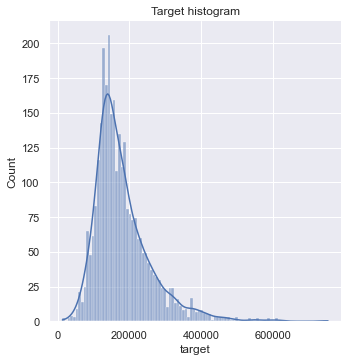

In [1241]:
#Skewed. We dont want to delete outliers in target.
sns.displot(df.target, bins=100, kde=True)
plt.title('Target histogram');

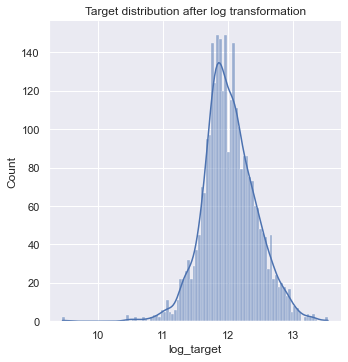

In [1242]:
## https://gdcoder.com/when-why-to-use-log-transformation-in-regression/
df = df.assign(log_target=np.log1p(df.target))
sns.displot(df.log_target, bins=100, kde=True)
plt.title('Target distribution after log transformation');

#logarithmic transformation improved distribution. 

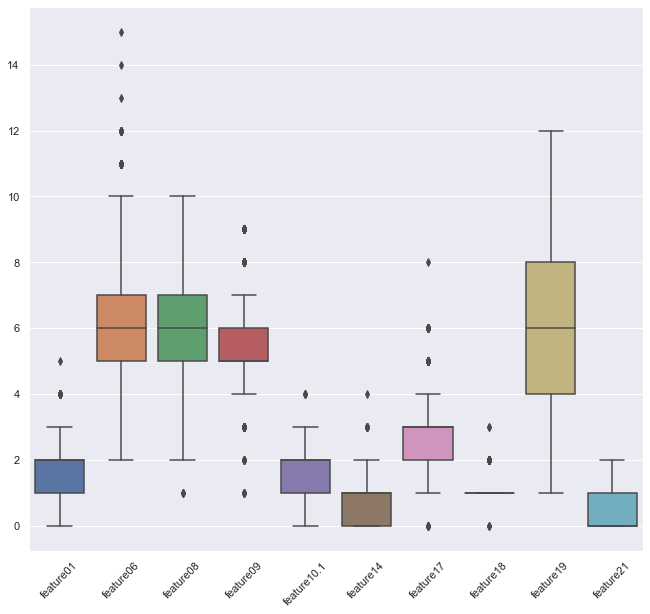

In [1243]:
#features range dec.
ax1 = sns.boxplot(data = df[['feature01','feature06','feature08','feature09', 'feature10.1', 'feature14', 'feature17','feature18','feature19','feature21']])
ax1.tick_params(axis='x', labelrotation=45)

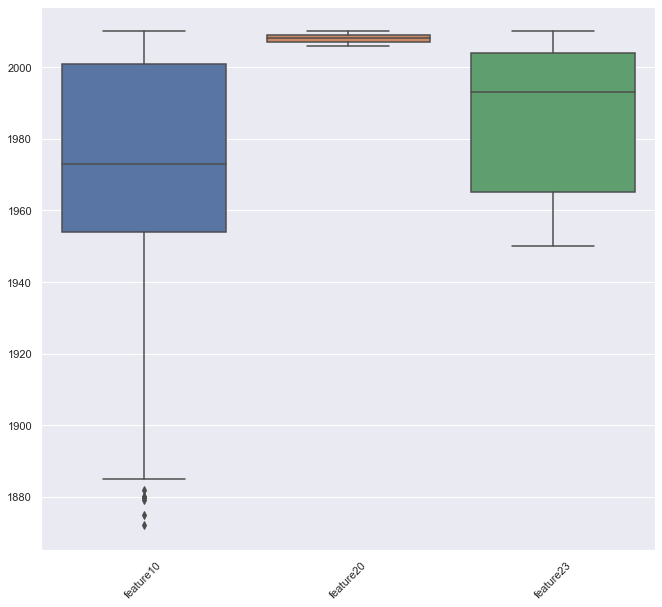

In [1244]:
#Probably represent year
ax2 = sns.boxplot(data = df[['feature10','feature20','feature23']])
ax2.tick_params(axis='x', labelrotation=45)

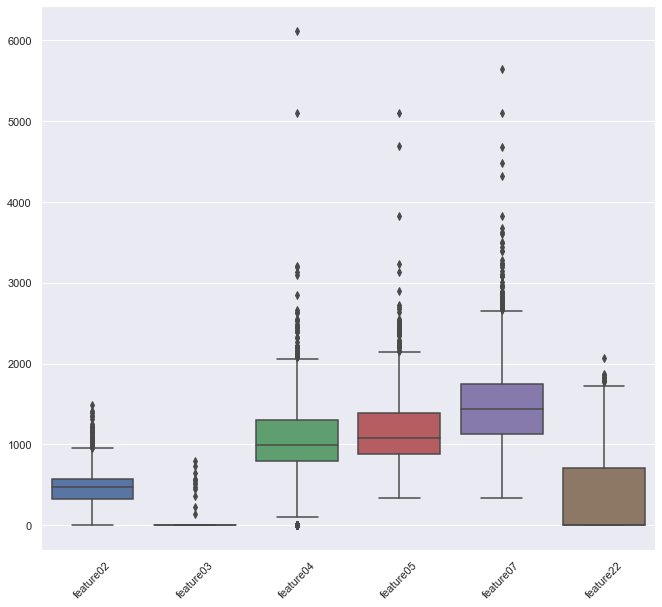

In [1245]:
# Other num
ax3 = sns.boxplot(data = df[['feature02','feature03','feature04', 'feature05', 'feature07','feature22']])
ax3.tick_params(axis='x', labelrotation=45)

In [1246]:
#Seem to be most low variance numerical features, therefore will not show any patterns
print(df.feature03.value_counts())  
print(df.feature18.value_counts())

0      2914
144       1
480       1
576       1
555       1
368       1
444       1
228       1
561       1
519       1
648       1
800       1
512       1
738       1
Name: feature03, dtype: int64
1    2793
2     129
0       3
3       2
Name: feature18, dtype: int64


In [1247]:
#columns with non numerical, categorical data + missing data
print(df.feature11.value_counts()) #2732-missing. will delete.
print(df.feature12.value_counts()) #2358-missing. will turn into one column - animal yes/no 0/1 
print(df.feature15.value_counts()) #1442-missing. will impulate. 
print(df.feature16.value_counts()) #keep
print(df.feature13.value_counts()) #keep

Grvl    120
Pave     78
Name: feature11, dtype: int64
dog     328
cat     118
cow     112
frog     12
Name: feature12, dtype: int64
good        744
bad         600
okay         75
horrible     46
amazing      43
Name: feature15, dtype: int64
bad         1493
good        1158
amazing      205
okay          70
horrible       1
Name: feature16, dtype: int64
red       2681
blue       187
green       50
yellow       8
pink         1
Name: feature13, dtype: int64


In [1248]:
df_raw=df.copy()  #test dataset, fully deleted columns with data missing. 
df_raw.drop(columns =['feature11', "feature12", 'feature15'], axis=1, inplace=True)
df_raw = pd.concat((df_raw, pd.get_dummies(df_raw.feature13, prefix="f13", prefix_sep='_')), axis=1)
df_raw = pd.concat((df_raw, pd.get_dummies(df_raw.feature16, prefix="f16", prefix_sep='_')), axis=1)
df_raw.drop(columns =["feature13", "feature16"], axis=1, inplace=True)

df_clean = df.copy() #main dataset, transformations with categorical data.
df_clean.feature12 = [0 if pd.isna(x) else 1 for x in df_clean.feature12]
df_clean = pd.concat((df_clean, pd.get_dummies(df_clean.feature13, prefix="f13", prefix_sep='_')), axis=1)
df_clean = pd.concat((df_clean, pd.get_dummies(df_clean.feature16, prefix="f16", prefix_sep='_')), axis=1)
df_clean.drop(columns =['feature03', 'feature11',"feature13", "feature16",'feature18'], axis=1, inplace=True)
#f15 need to impulate later


#### Correlations
https://www.tessellationtech.io/data-science-stats-review/
There are different methods used to look into correlations between variables - Pearson’s, Kendall’s, and Spearman’s Correlation. While first requires continuous variables and normal distribution, and measures only linear relationship, other too are measuring how likely two variables are moving in the same direction. 

- Kendall points on features 01, 02, 07, 08, 10, 10.1
- Spearman adds feature 04, 05, 23
- Pearson also points at similar features, but brings feature 14 up.
- Dummies f16-amazing and f16-bad, show some correlation.

This correlation matrix not only suggests top correlated features but also shows that dependend variables are not highly connected between eachother. Something that would worsen our results multicollinearity issue.) Tried to delete some variables that were depenndend, but it didnt improve results.


/Users/severin/opt/miniconda3/envs/S__ENV/lib/python3.9/site-packages/seaborn/matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


<AxesSubplot:>

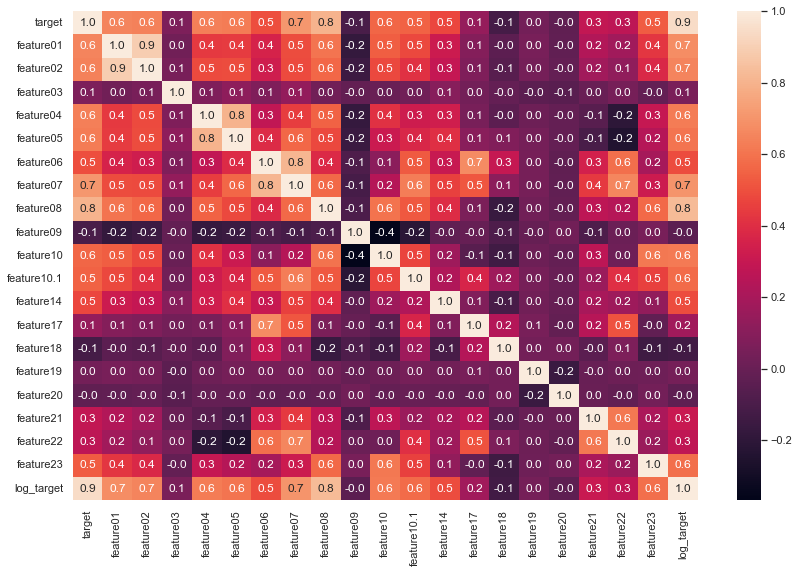

In [1249]:
#original dataset without feature03,feature18, and categorical data
plt.figure(figsize = (14,9))
sns.heatmap(df.corr(method='pearson'), annot = True, fmt='.1f')

<AxesSubplot:>

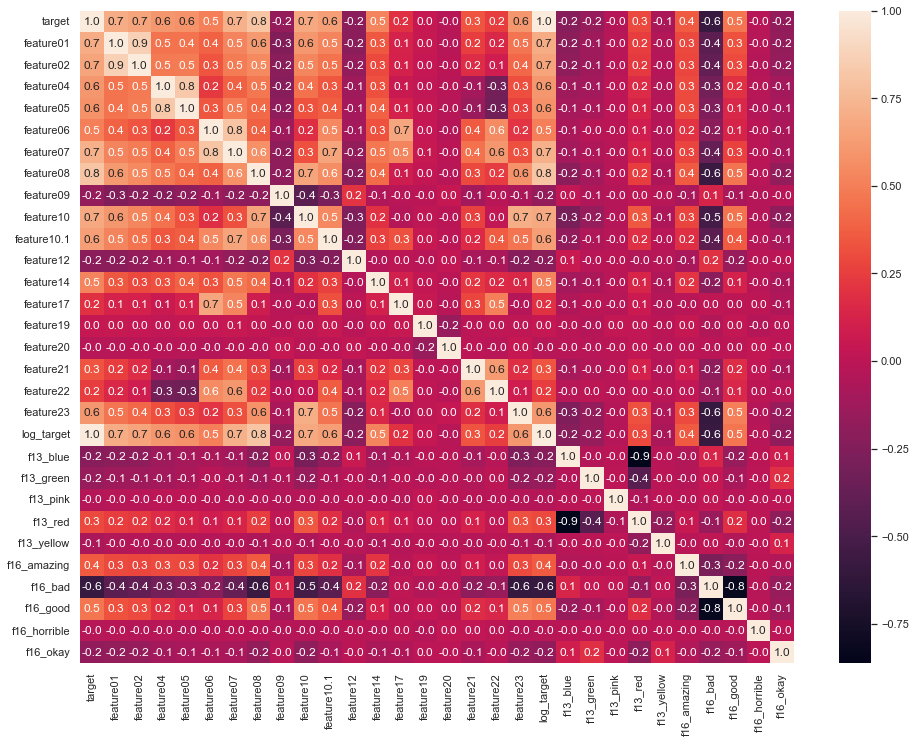

In [1250]:
#new dataset with dummies
plt.figure(figsize = (16,12))
sns.heatmap(df_clean.corr(method='spearman'), annot = True, fmt='.1f')

#### top correlated with target features

In [1251]:
#Top correlated features (also confirmed by analisys of different stat methods)

top_corr_features = df_clean.drop("target",axis=1).corr().loc['log_target'].apply(np.abs).sort_values(ascending=False).index[1:11]
top_corr_features = list(top_corr_features)
top_corr_features.append('f16_amazing')
top_corr_features

['feature08',
 'feature07',
 'feature01',
 'feature02',
 'feature04',
 'feature10',
 'feature05',
 'feature23',
 'feature10.1',
 'f16_bad',
 'f16_amazing']

### Modelling

#### Will start work with few versions of datasets: 
- **df_raw** 
X0_train: all original, columns with missing categorical data deleted. y0_train: original
- **df_clean** \
X1_train: all cleaned, categorical data manipulated, data standartised. y1_train: log tranformed \
X2_train: cleaned and top_corr_features, categorical data manipulated, data standartised. y2_train: log tranformed \

**feature scaling** for data normalisation is needed as we saw differences in scale of variables. 

And then based on results we will continue finetuning models with best results

In [1253]:
comp_table = pd.DataFrame(index=['df_raw', 'clean_all', 'clean_corr'], 
                      columns=['NULL', 'MLR', 'KNN', 'LASSO'])

In [1254]:
X0 = df_raw.drop(columns=['target', 'log_target'], axis = 1)
y0 = df_raw['target']

X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size = 0.2, random_state = 789)


In [1255]:
X1 = df_clean.drop(columns=['target', 'log_target'], axis = 1)
y1 = df_clean['log_target']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 123)

#fixing NaNs, feature 15
my_imputer = SimpleImputer(strategy = "most_frequent")
X1_train = pd.DataFrame(my_imputer.fit_transform(X1_train))
X1_test = pd.DataFrame(my_imputer.transform(X1_test))

#placing columns back after imp.
X1_train.columns = X1.columns
X1_test.columns = X1.columns

X1_train = pd.concat((X1_train, pd.get_dummies(X1_train.feature15, prefix="f15", prefix_sep='_')), axis=1)
X1_test = pd.concat((X1_test, pd.get_dummies(X1_test.feature15, prefix="f15", prefix_sep='_')), axis=1)

X1_train.drop("feature15", axis = 1, inplace = True)
X1_test.drop("feature15", axis = 1, inplace = True)

#saving df for futuire
Xx_train = X1_train.copy()
Xx_test = X1_test.copy()


# X2 = X1 of top features
X2_train = X1_train[top_corr_features]
X2_test = X1_test[top_corr_features]
y2_train = y1_train
y2_test = y1_test

#data normalisation with StandardScaler


sc=StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)




In [1256]:
# Preliminary checking metrics/models, and looking at numbers RMSE seem preferrable. 
#its both sensible to outliers that we have and wont delete in the first tests. but also comparable with the target.
#Removed Lasso as it showed a warning message for nonprocessed data, and put a random forest for a preliminary check,
#if essemble methods have a potential.

models = [LinearRegression(), KNeighborsRegressor(), RandomForestRegressor()]
scores = dict()

for m in models:
    m.fit(X0_train, y0_train)
    y0_pred = m.predict(X0_test)

    print(f'model: {str(m)}')
    print(f'MSE: {round(mean_squared_error(y0_test, y0_pred), 3)}')
    print(f'RMSE: {round(np.sqrt(mean_squared_error(y0_test, y0_pred)), 3)}')
    print(f'MAE: {round(mean_absolute_error(y0_test, y0_pred), 3)}')
    print('-'*30, '\n')

model: LinearRegression()
MSE: 1717318092.339
RMSE: 41440.537
MAE: 21536.476
------------------------------ 

model: KNeighborsRegressor()
MSE: 1835000440.81
RMSE: 42836.905
MAE: 25981.457
------------------------------ 

model: RandomForestRegressor()
MSE: 996702141.041
RMSE: 31570.59
MAE: 18093.24
------------------------------ 



In [1258]:
#NULL X0. X1, X2

y_pred_null = y0_train.mean()
comp_table.loc['df_raw','NULL'] = np.sqrt(mean_squared_error(y_pred=np.repeat(y_pred_null, y0_test.size), y_true=y0_test))

y_pred_null = np.exp(y1_train.mean())
comp_table.loc['clean_all','NULL'] = np.sqrt(mean_squared_error(y_pred=np.repeat(y_pred_null, y1_test.size), y_true=np.exp(y1_test)))

y_pred_null = np.exp(y2_train.mean())
comp_table.loc['clean_corr','NULL'] = np.sqrt(mean_squared_error(y_pred=np.repeat(y_pred_null, y2_test.size), y_true=np.exp(y2_test)))

#Linear Regressions X0, X1, X2

linear0 = LinearRegression()
linear0.fit(X0_train, y0_train)
comp_table.loc['df_raw','MLR'] = np.sqrt(mean_squared_error(y0_test, linear0.predict(X0_test)))

linear1 = LinearRegression()
linear1.fit(X1_train, y1_train)
comp_table.loc['clean_all','MLR'] = np.sqrt(mean_squared_error(np.exp(y1_test), np.exp(linear1.predict(X1_test))))

linear2 = LinearRegression()
linear2.fit(X2_train, y2_train)
comp_table.loc['clean_corr','MLR'] = np.sqrt(mean_squared_error(np.exp(y2_test), np.exp(linear2.predict(X2_test))))

In [1259]:
knn0_dict = {}
knn1_dict = {}
knn2_dict = {}
for i in range(3,21):
    knn0 = KNeighborsRegressor(n_neighbors=i, weights='uniform', metric='euclidean')
    knn1 = KNeighborsRegressor(n_neighbors=i, weights='uniform', metric='euclidean')
    knn2 = KNeighborsRegressor(n_neighbors=i, weights='uniform', metric='euclidean')
    knn0.fit(X0_train, y0_train)
    knn1.fit(X1_train, y1_train)
    knn2.fit(X2_train, y2_train)
    knn0_dict[i] = np.sqrt(mean_squared_error(knn0.predict(X0_test), y0_test))
    knn1_dict[i] = np.sqrt(mean_squared_error(np.exp(knn1.predict(X1_test)), np.exp(y1_test)))
    knn2_dict[i] = np.sqrt(mean_squared_error(np.exp(knn2.predict(X2_test)), np.exp(y2_test)))

lowest0 = min(knn0_dict, key=knn0_dict.get)
lowest1 = min(knn1_dict, key=knn1_dict.get)
lowest2 = min(knn2_dict, key=knn2_dict.get)

comp_table.loc['df_raw','KNN'] = knn0_dict[lowest0]
comp_table.loc['clean_all','KNN'] = knn1_dict[lowest1]
comp_table.loc['clean_corr','KNN'] = knn2_dict[lowest2]

In [1260]:
#takes35 seconds

##import warnings
#warnings.filterwarnings("once")

lasso0_dict = {}
lasso1_dict = {}
lasso2_dict = {}

for i in np.arange(0.0001,0.95,0.005):
    #lasso0 = Lasso(alpha=(i)) #warning for regularisation! what we did with further datasets
    lasso1 = Lasso(alpha=i)
    lasso2 = Lasso(alpha=i)
    #lasso0.fit(X0_train, y0_train)
    lasso1.fit(X1_train, y1_train)
    lasso2.fit(X2_train, y2_train)
    #lasso0_dict[i] = np.sqrt(mean_squared_error(lasso0.predict(X0_test), y0_test))
    lasso1_dict[i] = np.sqrt(mean_squared_error(np.exp(lasso1.predict(X1_test)), np.exp(y1_test)))
    lasso2_dict[i] = np.sqrt(mean_squared_error(np.exp(lasso2.predict(X2_test)), np.exp(y2_test)))

#lowest0 = min(lasso0_dict, key=lasso0_dict.get)
lowest1 = min(lasso1_dict, key=lasso1_dict.get)
lowest2 = min(lasso2_dict, key=lasso2_dict.get)

#comp_table.loc['df_raw', 'LASSO'] = lasso0_dict[lowest0]
comp_table.loc['clean_all', 'LASSO'] = lasso1_dict[lowest1]
comp_table.loc['clean_corr', 'LASSO'] = lasso2_dict[lowest2]

"""
#will save top features according to Lasso model
top_lasso=[]
print('Features automatically choosen by Lasso:\n')
for i in X0_train.columns[lasso0.coef_>0]:
   top_lasso.append(i)
top_lasso
"""



"\n#will save top features according to Lasso model\ntop_lasso=[]\nprint('Features automatically choosen by Lasso:\n')\nfor i in X0_train.columns[lasso0.coef_>0]:\n   top_lasso.append(i)\ntop_lasso\n"

In [1261]:
comp_table

,NULL,MLR,KNN,LASSO
df_raw,76981.452924,41440.536825,40566.100886,NaN
clean_all,80276.845135,24254.826007,29691.628201,24181.481204
clean_corr,80276.845135,25326.636777,26697.418702,25330.123747


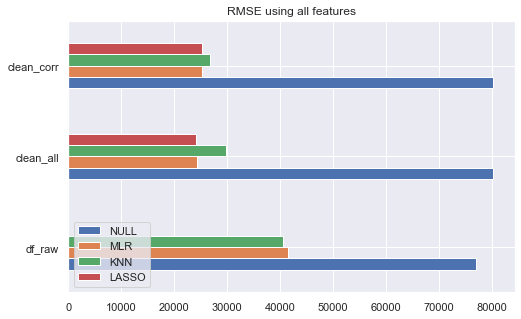

In [1262]:
fig, ax = plt.subplots(figsize=(8,5))
comp_table.plot(kind='barh', ax=ax)
ax.set_title('RMSE using all features')
ax.legend(loc=3);

In [1265]:
#As we got lasso correlation, will look how they . Didnt perform well.
"""X3_train = X0_train[top_lasso]
X3_test = X0_test[top_lasso]
y3_train = y0_train
y3_test = y0_test

X3_train = sc.fit_transform(X3_train)
X3_test= sc.transform(X3_test)"""

'X3_train = X0_train[top_lasso]\nX3_test = X0_test[top_lasso]\ny3_train = y0_train\ny3_test = y0_test\n\nX3_train = sc.fit_transform(X3_train)\nX3_test= sc.transform(X3_test)'

In [1264]:
"""linear3 = LinearRegression()
linear3.fit(X3_train, y3_train)
comp_table.loc['top_lasso','MLR'] = np.sqrt(mean_squared_error(y3_test,linear3.predict(X3_test)))


knn3_dict = {}
for i in range(3,21):
    knn3 = KNeighborsRegressor(n_neighbors=i, weights='uniform', metric='euclidean')
    knn3.fit(X3_train, y3_train)
    knn3_dict[i] = np.sqrt(mean_squared_error(knn3.predict(X3_test), y3_test))

lowest3 = min(knn3_dict, key=knn3_dict.get)
comp_table.loc['top_lasso','KNN'] = knn3_dict[lowest3]

lasso3 = Lasso()
lasso3_dict = {}

for i in np.arange(0.0001,0.95,0.005):
    lasso3 = Lasso(alpha=i)
    lasso3.fit(X3_train, y3_train)
    lasso3_dict[i/10] = np.sqrt(mean_squared_error(lasso3.predict(X3_test), y3_test))

lowest3 = min(lasso3_dict, key=lasso3_dict.get)

comp_table.loc['top_lasso', 'LASSO'] = lasso3_dict[lowest3]
"""

### It didnt perform well, so wont include in the table.


"linear3 = LinearRegression()\nlinear3.fit(X3_train, y3_train)\ncomp_table.loc['top_lasso','MLR'] = np.sqrt(mean_squared_error(y3_test,linear3.predict(X3_test)))\n\n\nknn3_dict = {}\nfor i in range(3,21):\n    knn3 = KNeighborsRegressor(n_neighbors=i, weights='uniform', metric='euclidean')\n    knn3.fit(X3_train, y3_train)\n    knn3_dict[i] = np.sqrt(mean_squared_error(knn3.predict(X3_test), y3_test))\n\nlowest3 = min(knn3_dict, key=knn3_dict.get)\ncomp_table.loc['top_lasso','KNN'] = knn3_dict[lowest3]\n\nlasso3 = Lasso()\nlasso3_dict = {}\n\nfor i in np.arange(0.0001,0.95,0.005):\n    lasso3 = Lasso(alpha=i)\n    lasso3.fit(X3_train, y3_train)\n    lasso3_dict[i/10] = np.sqrt(mean_squared_error(lasso3.predict(X3_test), y3_test))\n\nlowest3 = min(lasso3_dict, key=lasso3_dict.get)\n\ncomp_table.loc['top_lasso', 'LASSO'] = lasso3_dict[lowest3]\n"

In [1172]:
### After modelling - dataset clean_all and clean_corr, showed best results. will continue finetuning these datasets.
###first by using robist scaler, and then assemble methods.
comp_table

,NULL,MLR,KNN,LASSO
df_raw,76981.452924,41440.536825,40566.100886,41440.000798
clean_all,80276.845135,24254.826007,29691.628201,24181.481204
clean_corr,80276.845135,25326.636777,26697.418702,25330.123747


### Extra finetuning
Now when clean_all and clean_corr showed best results, meaning that we got some results from data preprocessing, we can employ more advanced solutions.

In [1266]:
X1r_train = Xx_train.copy()
X1r_test = Xx_test.copy()

X2r_train = Xx_train[top_corr_features].copy()
X2r_test = Xx_test[top_corr_features].copy()

rc = RobustScaler()
X1r_train = rc.fit_transform(X1r_train)
X1r_test = rc.transform(X1r_test)

X2r_train = rc.fit_transform(X2r_train)
X2r_test = rc.transform(X2r_test)

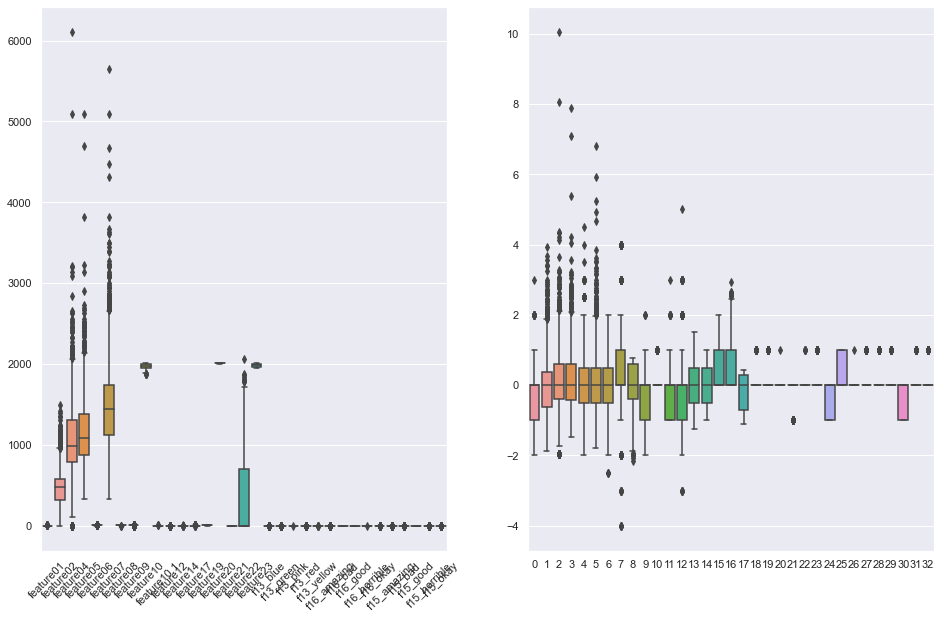

'\n### Tried to delete outliers but didnt show better results\n'

In [1268]:

#visualising how rubust scaler work that adjusts data basetd on Q1-Q3 range.
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(16,10)
sns.boxplot(data = pd.concat([Xx_train, Xx_test], axis=0), ax=ax1)
sns.boxplot(data = rc.fit_transform(pd.concat([Xx_train, Xx_test], axis=0)), ax=ax2)
ax1.tick_params(axis='x', labelrotation=45)
plt.show()


"""
### Tried to delete outliers but didnt show better results
"""

In [1270]:
#Predictions for datasets after robust scalrer)

linear1r = LinearRegression()
linear1r.fit(X1r_train, y1_train)
comp_table.loc['clean_allRC','MLR'] = np.sqrt(mean_squared_error(np.exp(y1_test), np.exp(linear1r.predict(X1r_test))))


knn_dict = {}
for i in range(3,25):
    knn1r = KNeighborsRegressor(n_neighbors=i, weights='uniform', metric='euclidean')
    knn1r.fit(X1r_train, y1_train)
    knn_dict[i] = np.sqrt(mean_squared_error(np.exp(knn1r.predict(X1r_test)), np.exp(y1_test)))

lowest2 = min(knn_dict, key=knn_dict.get)
comp_table.loc['clean_allRC','KNN'] = knn_dict[lowest2]


lasso2_dict = {}

for i in np.arange(0.0001,0.95,0.005):
    lasso1r = Lasso(alpha=i)
    lasso1r.fit(X1r_train, y1_train)
    lasso2_dict[i/10] = np.sqrt(mean_squared_error(np.exp(lasso1r.predict(X1r_test)), np.exp(y1_test)))

lowest2 = min(lasso2_dict, key=lasso2_dict.get)

comp_table.loc['clean_allRC', 'LASSO'] = lasso2_dict[lowest2]



In [1271]:
#Predictions for datasets after robust scalrer on top correlated
linear2r = LinearRegression()
linear2r.fit(X2r_train, y1_train)
comp_table.loc['clean_corrRC','MLR'] = np.sqrt(mean_squared_error(np.exp(y1_test), np.exp(linear2r.predict(X2r_test))))


knn_dict = {}
for i in range(3,25):
    knn2r = KNeighborsRegressor(n_neighbors=i, weights='uniform', metric='euclidean')
    knn2r.fit(X2r_train, y1_train)
    knn_dict[i] = np.sqrt(mean_squared_error(np.exp(knn2r.predict(X2r_test)), np.exp(y1_test)))

lowest2 = min(knn_dict, key=knn_dict.get)
comp_table.loc['clean_corrRC','KNN'] = knn_dict[lowest2]


lasso2_dict = {}

for i in np.arange(0.0001,0.95,0.005):
    lasso2r = Lasso(alpha=i)
    lasso2r.fit(X2r_train, y1_train)
    lasso2_dict[i/10] = np.sqrt(mean_squared_error(np.exp(lasso2r.predict(X2r_test)), np.exp(y1_test)))

lowest2 = min(lasso2_dict, key=lasso2_dict.get)

comp_table.loc['clean_corrRC', 'LASSO'] = lasso2_dict[lowest2]

### Esembling methods
Now when with simple methods clean_all and clean corr showed best results we will add essemble methods.

In [1272]:
bagging = BaggingRegressor(base_estimator=linear1, n_estimators=10, max_features=0.75, 
                            random_state=55, n_jobs=-1)
bagging.fit(X1_train, y1_train)
comp_table.loc['clean_all', 'Bagging'] = np.sqrt(mean_squared_error(np.exp(bagging.predict(X1_test)), np.exp(y1_test)))


boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)                             
boosting.fit(X1_train, y1_train)
comp_table.loc['clean_all', 'Boosting'] = np.sqrt(mean_squared_error(np.exp(boosting.predict(X1_test)), np.exp(y1_test)))


forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=0)
forest.fit(X1_train, y1_train)
comp_table.loc['clean_all', 'Forest'] = np.sqrt(mean_squared_error(np.exp(forest.predict(X1_test)), np.exp(y1_test)))

In [1273]:
bagging = BaggingRegressor(base_estimator=linear2, n_estimators=10, max_features=0.75, 
                            random_state=55, n_jobs=-1)
bagging.fit(X2_train, y2_train)
comp_table.loc['clean_corr', 'Bagging'] = np.sqrt(mean_squared_error(np.exp(bagging.predict(X2_test)), np.exp(y1_test)))


boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)                             
boosting.fit(X2_train, y2_train)
comp_table.loc['clean_corr', 'Boosting'] = np.sqrt(mean_squared_error(np.exp(boosting.predict(X2_test)), np.exp(y1_test)))


forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=0)
forest.fit(X2_train, y2_train)
comp_table.loc['clean_corr', 'Forest'] = np.sqrt(mean_squared_error(np.exp(forest.predict(X2_test)), np.exp(y1_test)))

In [1274]:
bagging = BaggingRegressor(base_estimator=linear1r, n_estimators=10, max_features=0.75, 
                            random_state=55, n_jobs=-1)
bagging.fit(X1r_train, y1_train)
comp_table.loc['clean_allRC', 'Bagging'] = np.sqrt(mean_squared_error(np.exp(bagging.predict(X1r_test)), np.exp(y1_test)))


boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)                             
boosting.fit(X1r_train, y1_train)
comp_table.loc['clean_allRC', 'Boosting'] = np.sqrt(mean_squared_error(np.exp(boosting.predict(X1r_test)), np.exp(y1_test)))


forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=0)
forest.fit(X1r_train, y1_train)
comp_table.loc['clean_allRC', 'Forest'] = np.sqrt(mean_squared_error(np.exp(forest.predict(X1r_test)), np.exp(y1_test)))




In [1275]:
bagging = BaggingRegressor(base_estimator=linear2r, n_estimators=10, max_features=0.75, 
                            random_state=55, n_jobs=-1)
bagging.fit(X2r_train, y1_train)
comp_table.loc['clean_corrRC', 'Bagging'] = np.sqrt(mean_squared_error(np.exp(bagging.predict(X2r_test)), np.exp(y1_test)))


boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)                             
boosting.fit(X2r_train, y1_train)
comp_table.loc['clean_corrRC', 'Boosting'] = np.sqrt(mean_squared_error(np.exp(boosting.predict(X2r_test)), np.exp(y1_test)))


forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=0)
forest.fit(X2r_train, y1_train)
comp_table.loc['clean_corrRC', 'Forest'] = np.sqrt(mean_squared_error(np.exp(forest.predict(X2r_test)), np.exp(y1_test)))

In [1276]:
#it looks like original work with standard scaler gave better results.
comp_table

,NULL,MLR,KNN,LASSO,Bagging,Boosting,Forest
df_raw,76981.452924,41440.536825,40566.100886,NaN,NaN,NaN,NaN
clean_all,80276.845135,24254.826007,29691.628201,24181.481204,26559.359236,38633.209077,29328.485791
clean_corr,80276.845135,25326.636777,26697.418702,25330.123747,26594.504111,38400.741279,30416.906300
clean_allRC,NaN,24245.596023,27320.21231,24237.924254,26564.459225,38170.737540,29383.863424
clean_corrRC,NaN,25326.636777,27171.158878,25340.811645,26594.504111,38695.947790,30473.265057


In [1279]:
#lets try recursive feature selector if it will suggest another set of features. 
#55 seconds

recursive_selector = RFE(estimator=forest, n_features_to_select=12)
recursive_selector = recursive_selector.fit(X1r_train, y1_train)
recursive_selector.support_

RS_topfeatures = Xx_train.columns[recursive_selector.support_]

In [1280]:
XR_train = Xx_train[RS_topfeatures]
XR_test = Xx_test[RS_topfeatures]


#data normalisation with StandardScaler


sc=StandardScaler()
XR_train = sc.fit_transform(XR_train)
XR_test = sc.transform(XR_test)

In [1287]:
linearxr = LinearRegression()
linearxr.fit(XR_train, y1_train)
comp_table.loc['RFE','MLR'] = np.sqrt(mean_squared_error(np.exp(y1_test), np.exp(linearxr.predict(XR_test))))


knn_dict = {}
for i in range(3,25):
    knnxr = KNeighborsRegressor(n_neighbors=i, weights='uniform', metric='euclidean')
    knnxr.fit(XR_train, y1_train)
    knn_dict[i] = np.sqrt(mean_squared_error(np.exp(knnxr.predict(XR_test)), np.exp(y1_test)))

lowest2 = min(knn_dict, key=knn_dict.get)
comp_table.loc['RFE','KNN'] = knn_dict[lowest2]


lasso2_dict = {}

for i in np.arange(0.0001,0.95,0.005):
    lassoxr = Lasso(alpha=i)
    lassoxr.fit(XR_train, y1_train)
    lasso2_dict[i] = np.sqrt(mean_squared_error(np.exp(lassoxr.predict(XR_test)), np.exp(y1_test)))

lowest2 = min(lasso2_dict, key=lasso2_dict.get)

comp_table.loc['RFE', 'LASSO'] = lasso2_dict[lowest2]

bagging = BaggingRegressor(base_estimator=knnxr, n_estimators=10, max_features=0.75, 
                            random_state=55, n_jobs=-1)
bagging.fit(XR_train, y1_train)
comp_table.loc['RFE', 'Bagging'] = np.sqrt(mean_squared_error(np.exp(bagging.predict(XR_test)), np.exp(y1_test)))


boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)                             
boosting.fit(XR_train, y1_train)
comp_table.loc['RFE', 'Boosting'] = np.sqrt(mean_squared_error(np.exp(boosting.predict(XR_test)), np.exp(y1_test)))


forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=0)
forest.fit(XR_train, y1_train)
comp_table.loc['RFE', 'Forest'] = np.sqrt(mean_squared_error(np.exp(forest.predict(XR_test)), np.exp(y1_test)))

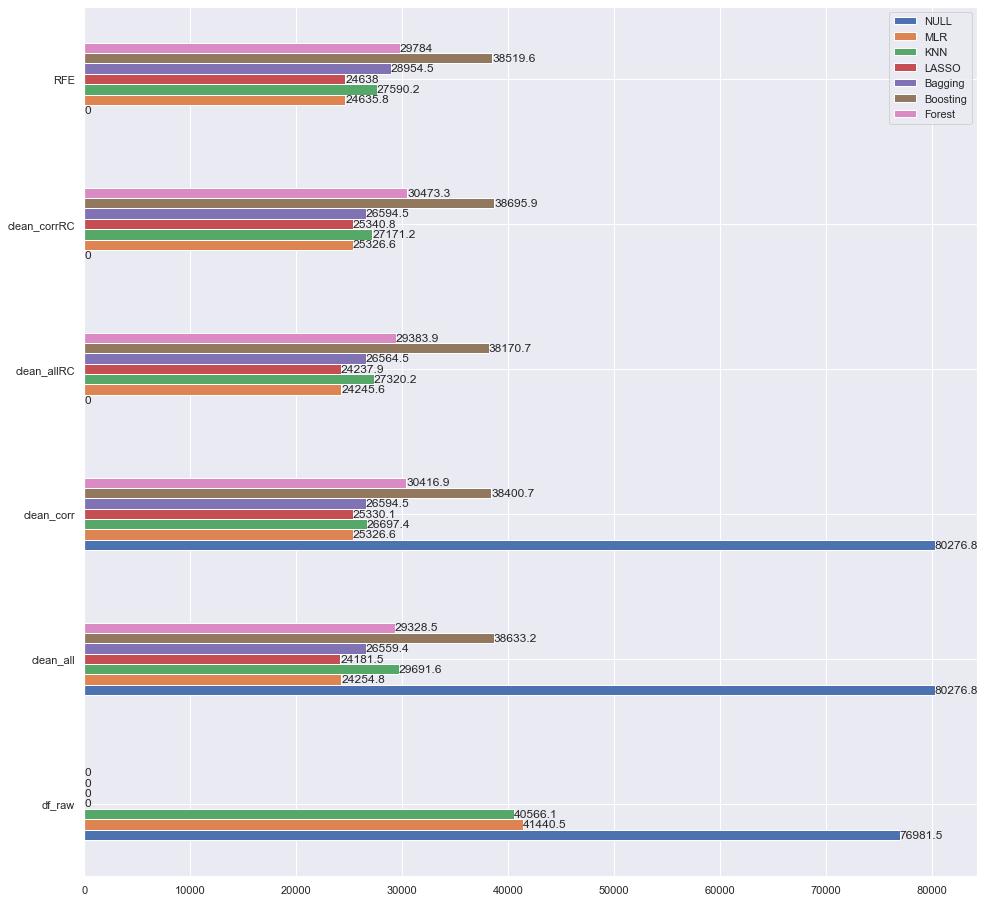

In [1288]:
fig, ax = plt.subplots(figsize=(16,16))
comp_table.plot(kind='barh', ax=ax)
ax.legend(loc=1)
for bars in ax.containers:
    ax.bar_label(bars)

#choosing top features with RFE didnt help much

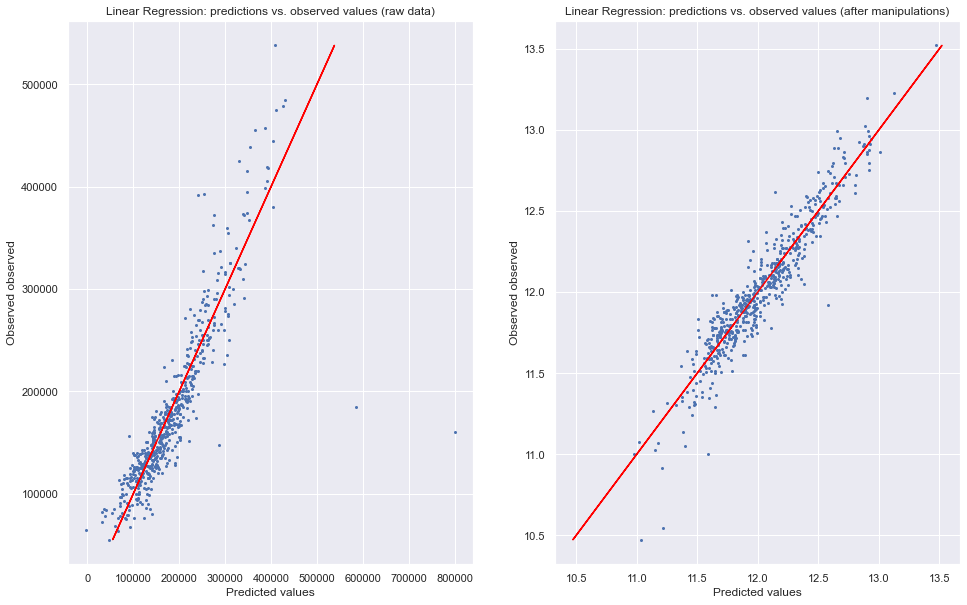

In [1289]:
fig,(ax, ax1) = plt.subplots(1,2, figsize=(16,10))
ax.scatter(linear0.predict(X0_test), y0_test, s=4)
ax.plot(y0_test, y0_test, color='red')
ax.set_title('Linear Regression: predictions vs. observed values (raw data)')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Observed observed');

ax1.scatter(linear1.predict(X1_test), y1_test, s=4)
ax1.plot(y1_test, y1_test, color='red')
ax1.set_title('Linear Regression: predictions vs. observed values (after manipulations)')
ax1.set_xlabel('Predicted values')
ax1.set_ylabel('Observed observed');

### Conclusions

Trying different manipulations with data we managed to lower error from NULL to RMSE of the chosen model down approx. with 75%. At the same time simple data preprocessing (deleting columns with low variability, or with too much missing values) made the most effect on prediction-error reductions. 

It is probably related to the fact that we made few steps towards meeting regression models assumptions.
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/
https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

- we observe a **linear correlation** between vaiables which allows us to use models.
- most of the variables according to the correlation matrix were already not highly correlated with each other. 
So we didnt face **multicollinearity issue**.
- we did **log transformation** to normally distribute our independent variables.
- The **variability** in our data set was mostly positive, sand two columns with low variability we deleted.

Automatic feature selection or Lasso feature selection didnt help. Also cutting outliers didnt help.

**Hypothesis** turned to be false in this situation ML models did not improve situation much, rather good data preprocessing did.
